In [7]:
from fastai.conv_learner import *
from classifier import ClassifierTrainer

In [12]:
ff = Path('/home/sean')
type(ff), isinstance(ff, Path)

(pathlib.PosixPath, True)

In [19]:
rli = transforms_top_down[1]

In [25]:
type(rli.__str__())

str

In [26]:
transforms_top_down.__str__()

'[<fastai.transforms.RandomRotate object at 0x7f8d3f57bcf8>, <fastai.transforms.RandomLighting object at 0x7f8d3f57bc88>, <fastai.transforms.RandomDihedral object at 0x7f8d3f57bda0>]'

In [2]:
ldir = Path('/home/sean/hpc-home/')
hdir = ldir if ldir.exists() else Path('/home/n8307628')
PATH = hdir / 'skin_cancer/'
assert PATH.exists(), 'PATH invalid: {}'.format(PATH)

train_raw_half_ia_nervi = PATH / 'train_multi_raw_half_ia_nervi.csv'
train_all_half_ia_nervi = PATH / 'train_multi_half_ia_nervi.csv'
arch = resnet101
im_size = 256
bs = 32

train_csv = train_all_half_ia_nervi
test_csv = PATH / 'ISIC/test_all_17.csv'
test_folder = 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
test_path = PATH / test_folder
assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
train_df = pd.read_csv(train_csv)
trlen = len(train_df)
val_idx = list(range(trlen - 150, trlen))

weight_name = 'resnet101_all_halfnervi'

trainer = ClassifierTrainer(PATH, arch, im_size, bs, train_csv, precom=False,
                            sn=weight_name, test_csv=test_csv, test_folder=test_folder, val_idx=val_idx)

Saving model as "resnet101_all_halfnervi"
Dataset has: ['keratosis', 'melanoma', 'nevus'] classes


 82%|████████▏ | 81/99 [00:03<00:00, 22.68it/s, loss=1.53]


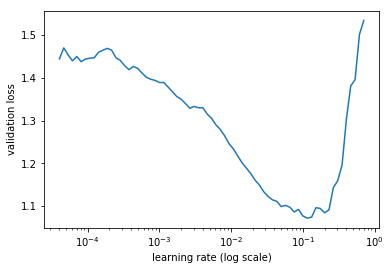

In [4]:
trainer.lr_find()

In [3]:
trainer.set_lr(1e-2)
print('training.')
trainer.init_fit(weight_name + '_1')

training.


epoch      trn_loss   val_loss   accuracy                    
    0      0.590808   1.707832   0.546667  
    1      0.510165   1.704264   0.56                        



epoch      trn_loss   val_loss   accuracy                    
    0      0.440931   1.620967   0.52      
    1      0.409212   1.57668    0.533333                    

Saved weights as "resnet101_all_halfnervi_1"


In [4]:
# trainer.load(weight_name + '_1')
tres = trainer.test_eval(tta=False, sf=False)
vres = trainer.test_val(tta=False, sf=False)

Loading ys from csv; shape (600,); vals [0 1 2]; in folder "ISIC/ISIC-2017_Test_v2_Data_Classification/"
Accuracy = 0.32
Confusion Matrix:
[[  0  71  46]
 [  0 122 271]
 [  0  20  70]]
AUC for class 0, id keratosis = 0.54
AUC for class 1, id melanoma = 0.40
AUC for class 2, id nevus = 0.61
Accuracy = 0.53
Confusion Matrix:
[[ 0 12 30]
 [ 0 17 13]
 [ 0 15 63]]
AUC for class 0, id keratosis = 0.59
AUC for class 1, id melanoma = 0.76
AUC for class 2, id nevus = 0.70


In [5]:
trainer.inter_fit(weight_name + '_2')
tres_2 = trainer.test_eval(tta=False, sf=False)

epoch      trn_loss   val_loss   accuracy                    
    0      0.399176   1.616855   0.546667  
    1      0.444386   1.709926   0.54                        
    2      0.392254   1.688768   0.546667                    

Saved weights as "resnet101_all_halfnervi_2"
Loading ys from csv; shape (600,); vals [0 1 2]; in folder "ISIC/ISIC-2017_Test_v2_Data_Classification/"
Accuracy = 0.28
Confusion Matrix:
[[  0  51  66]
 [  0  89 304]
 [  0  11  79]]
AUC for class 0, id keratosis = 0.56
AUC for class 1, id melanoma = 0.40
AUC for class 2, id nevus = 0.59


epoch      trn_loss   val_loss   accuracy                    
    0      0.448233   1.670056   0.573333  
    1      0.406042   1.719262   0.573333                    
    2      0.327715   1.69088    0.593333                    
    3      0.349065   1.757951   0.553333                    
    4      0.308441   1.723786   0.606667                    
    5      0.258262   1.763481   0.613333                    
    6      0.229388   1.792977   0.593333                    



epoch      trn_loss   val_loss   accuracy                    
    0      0.268048   1.972402   0.58      
    1      0.23332    1.785567   0.593333                    
    2      0.198593   1.840362   0.62                        
    3      0.232268   1.574364   0.573333                    
    4      0.190204   1.920206   0.573333                    
    5      0.172353   1.827635   0.606667                    
    6      0.199286   1.737376   0.6                         
    7      0.173864   1.844067   0.58                        
    8      0.138147   1.895905   0.573333                    
    9      0.169906   1.777533   0.606667                    
    10     0.129475   1.917396   0.62                        
    11     0.117277   1.915476   0.593333                    
    12     0.139177   2.164617   0.56                        
    13     0.125311   2.010912   0.613333                    
    14     0.087926   2.028773   0.613333                     

Saved weights as "resnet

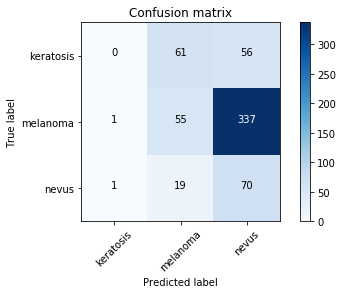

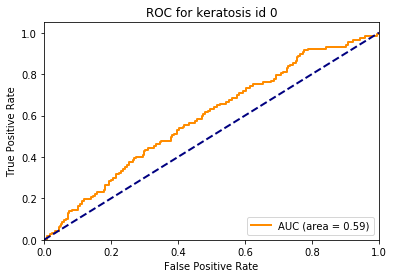

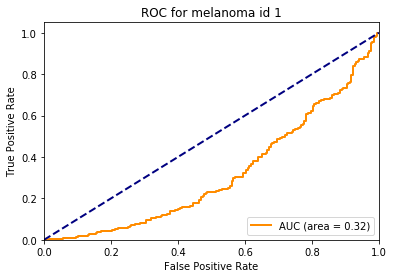

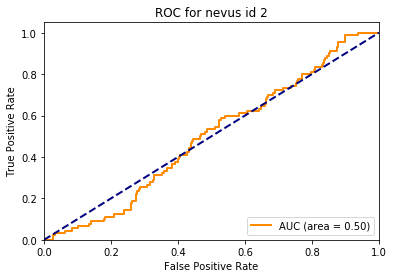

In [6]:
trainer.final_fit(weight_name + '_3')
vres_3 = trainer.test_val(tta=False)
tres_3 = trainer.test_eval(tta=False, sf=True)

Loading ys from csv; shape (600,); vals [0 1 2]
Accuracy = 0.24
Confusion Matrix:
[[ 17  24  76]
 [ 52  73 268]
 [ 10  28  52]]
AUC for class 0, id keratosis = 0.53
AUC for class 1, id melanoma = 0.48
AUC for class 2, id nevus = 0.46
----------------------------------------
[[ 17  24  76]
 [ 52  73 268]
 [ 10  28  52]]


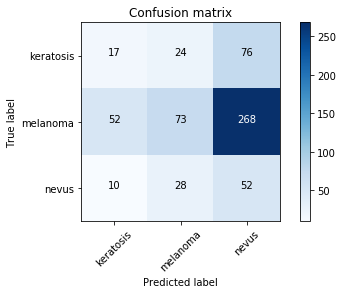

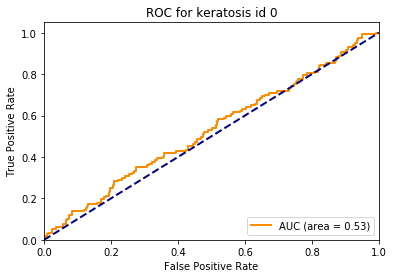

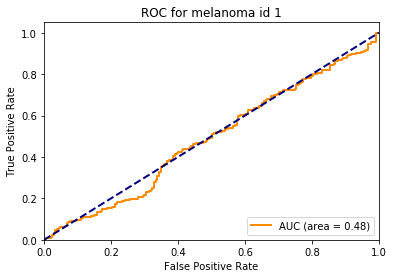

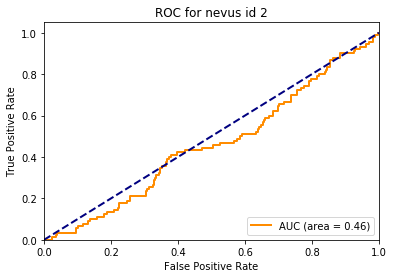

In [6]:
trainer.test_eval()

In [7]:
del trainer

--------

# Second Train with no ia nervi

--------------

In [3]:
ldir = Path('/home/sean/hpc-home/')
hdir = ldir if ldir.exists() else Path('/home/n8307628')
PATH = hdir / 'skin_cancer/'
assert PATH.exists(), 'PATH invalid: {}'.format(PATH)

arch = resnet101
im_size = 256
bs = 32

train_csv = PATH / 'train_multi_no_ia_nervi.csv'
test_csv = PATH / 'ISIC/test_all_17.csv'
test_path = PATH / 'ISIC/ISIC-2017_Test_v2_Data_Classification/'
assert all([train_csv.exists(), test_csv.exists(), test_path.is_dir()]),  [
    train_csv.exists(), test_csv.exists(), test_path.is_dir()]

# val_idx should be the last 150 images from the train csv
train_df = pd.read_csv(train_csv)
trlen = len(train_df)
val_idx = list(range(trlen - 150, trlen))

weight_name = 'resnet101_all_no_ia_nervi'

trainer2 = ClassifierTrainer(PATH, arch, im_size, bs, train_csv, 
                            sn=weight_name, test_csv=test_csv, test_folder=test_path, num_workers=4)
# trainer2.lr_find()

Saving model as "resnet101_all_no_ia_nervi"
Dataset has: ['keratosis', 'melanoma', 'nevus'] classes


epoch      trn_loss   val_loss   accuracy                 
    0      4.295664   512.222605 0.780702  



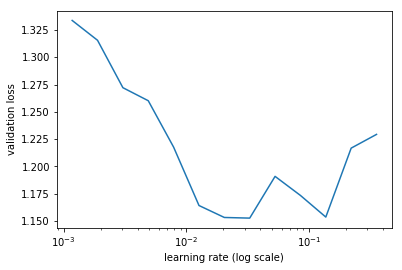

In [3]:
trainer2.lr_find()

training.


epoch      trn_loss   val_loss   accuracy                  
    0      0.678748   0.352704   0.875     
    1      0.507262   0.320718   0.892544                  
    2      0.409504   0.288221   0.901316                  
    3      0.358978   0.268351   0.912281                  



epoch      trn_loss   val_loss   accuracy                  
    0      0.235006   0.264491   0.907895  
    1      0.238596   0.260899   0.916667                  
    2      0.238113   0.266976   0.89693                   

Saved weights as "resnet101_all_no_ia_nervi_1"
Accuracy = 0.90                              
Confusion Matrix:
[[ 47   6   8]
 [  4 162  14]
 [  9   6 200]]
AUC for class 0, id keratosis = 0.97
AUC for class 1, id melanoma = 0.98
AUC for class 2, id nevus = 0.97
----------------------------------------
[[ 47   6   8]
 [  4 162  14]
 [  9   6 200]]


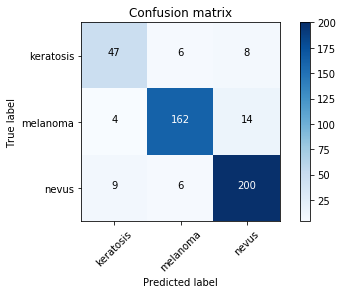

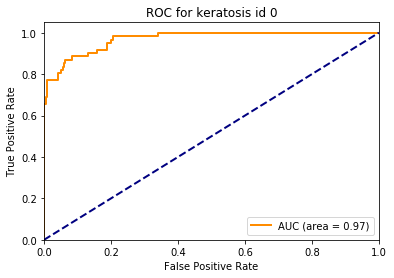

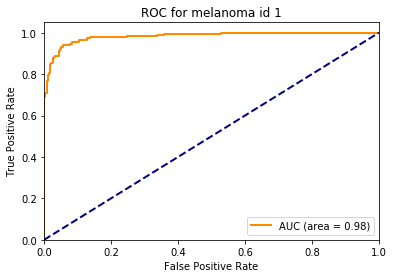

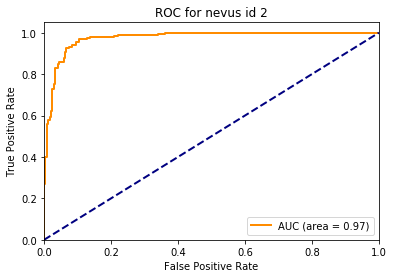

epoch      trn_loss   val_loss   accuracy                  
    0      0.365871   0.271608   0.910088  
    1      0.348227   0.271508   0.905702                  
    2      0.331699   0.258236   0.914474                  

Saved weights as "resnet101_all_no_ia_nervi_2"
Loading ys from csv; shape (600,); vals [0 1 2]
Accuracy = 0.40
Confusion Matrix:
[[ 23  58  36]
 [ 79 196 118]
 [ 18  51  21]]
AUC for class 0, id keratosis = 0.49
AUC for class 1, id melanoma = 0.46
AUC for class 2, id nevus = 0.45
----------------------------------------
[[ 23  58  36]
 [ 79 196 118]
 [ 18  51  21]]


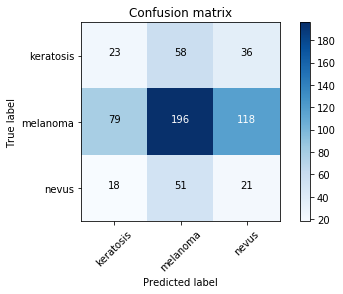

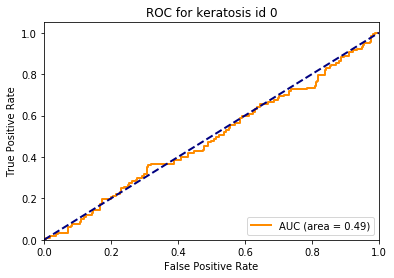

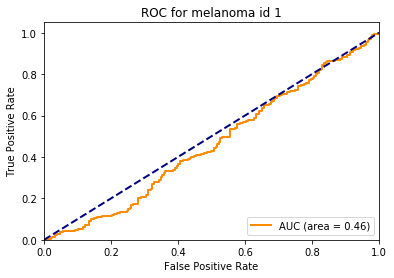

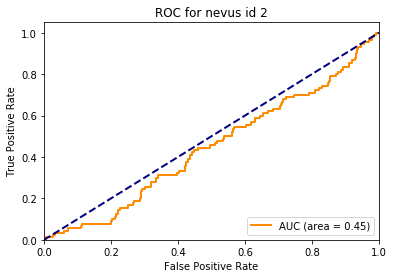

In [9]:
trainer2.set_lr(1e-2)
print('training.')
trainer2.init_fit(weight_name + '_1')
trainer2.test_val()
trainer2.inter_fit(weight_name + '_2')
trainer2.test_eval()

epoch      trn_loss   val_loss   accuracy                  
    0      0.929      0.452671   0.828947  
    1      0.657227   0.369684   0.885965                  
    2      0.552367   0.365915   0.881579                  
    3      0.499307   0.330928   0.879386                  
    4      0.450972   0.317119   0.894737                  
    5      0.422468   0.314689   0.901316                  
    6      0.406022   0.319431   0.894737                  
    7      0.384659   0.297348   0.905702                  
    8      0.368939   0.29825    0.903509                  
    9      0.361965   0.297738   0.89693                   
    10     0.345182   0.280509   0.912281                  
    11     0.338857   0.279855   0.905702                  
    12     0.325774   0.302276   0.901316                  
    13     0.316366   0.292411   0.907895                  
    14     0.312767   0.292762   0.905702                  

Saved weights as "resnet101_all_no_ia_nervi_3"
Accuracy

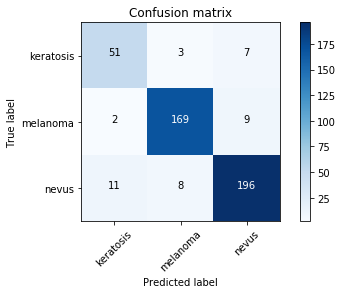

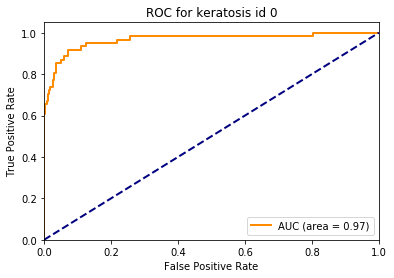

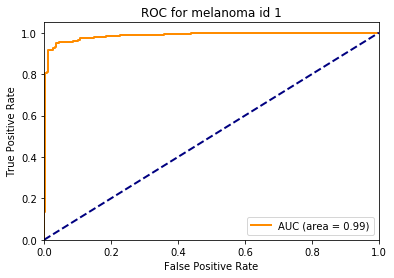

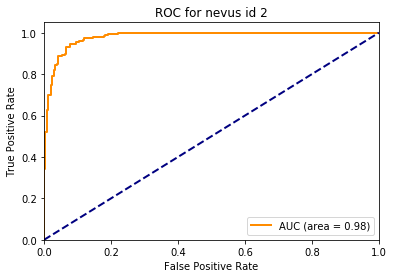

In [3]:
trainer2.final_fit(weight_name + '_3')
trainer2.test_val()

Loading ys from csv; shape (600,); vals [0 1 2]
Accuracy = 0.42
Confusion Matrix:
[[ 20  59  38]
 [ 62 213 118]
 [ 15  53  22]]
AUC for class 0, id keratosis = 0.50
AUC for class 1, id melanoma = 0.47
AUC for class 2, id nevus = 0.43
----------------------------------------
[[ 20  59  38]
 [ 62 213 118]
 [ 15  53  22]]


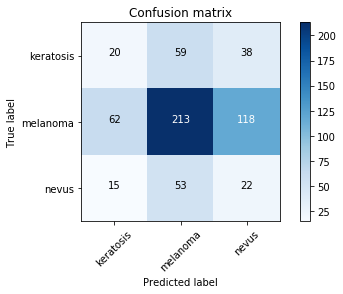

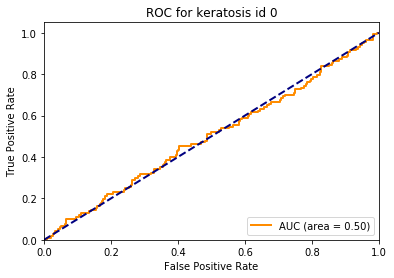

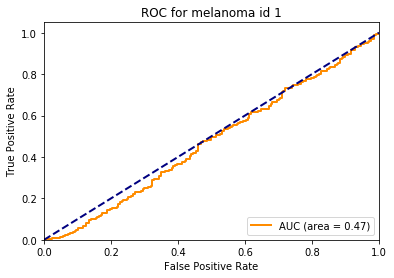

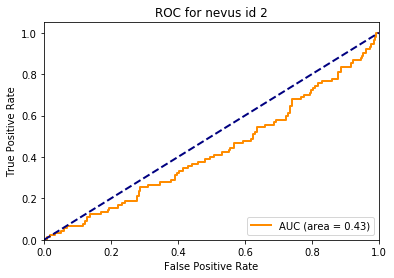

In [4]:
trainer2.test_eval()

In [4]:
trainer2.learn.precompute = False
trainer2.load(weight_name + '_3')

 93%|█████████▎| 27/29 [01:42<00:07,  3.78s/it, loss=1.12] 

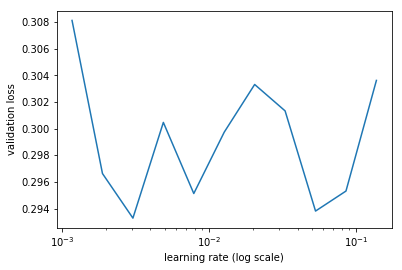

In [8]:
trainer2.lr_find()

epoch      trn_loss   val_loss   accuracy                  
    0      0.543192   0.288325   0.892544  
    1      0.37887    0.26942    0.905702                  
    2      0.294723   0.251143   0.905702                  
    3      0.274376   0.248381   0.899123                  
    4      0.226776   0.239015   0.916667                  
    5      0.179368   0.226308   0.925439                  
    6      0.205129   0.243432   0.910088                  
    7      0.1808     0.236622   0.923246                  
    8      0.162816   0.229228   0.921053                  
    9      0.151375   0.249092   0.91886                   
    10     0.133235   0.242366   0.916667                  
    11     0.118326   0.233784   0.916667                  
    12     0.129885   0.228165   0.934211                  
    13     0.129983   0.19127    0.936404                  
    14     0.102117   0.197971   0.929825                  

Saved weights as "resnet101_all_no_ia_nervi_4"
Loading 

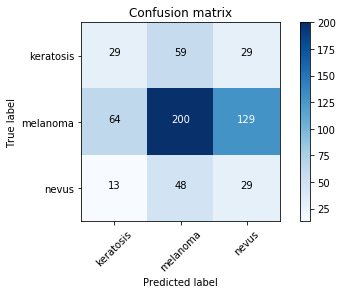

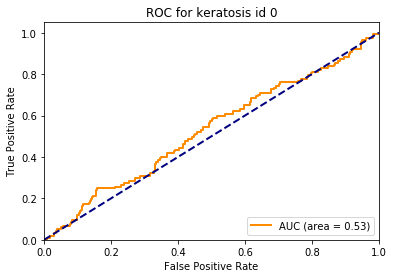

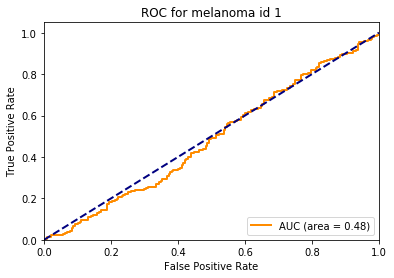

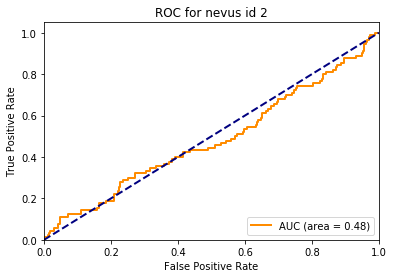

epoch      trn_loss   val_loss   accuracy                   
    0      0.097196   0.244788   0.916667  
    1      0.087632   0.229346   0.923246                   
    2      0.080669   0.215154   0.923246                   
    3      0.081664   0.248271   0.905702                   
    4      0.087139   0.243052   0.91886                    
    5      0.087222   0.20906    0.940789                   
    6      0.066454   0.203535   0.938596                   



epoch      trn_loss   val_loss   accuracy                   
    0      0.048376   0.211459   0.932018  
    1      0.061101   0.246617   0.923246                   
    2      0.047679   0.221686   0.932018                   
    3      0.045181   0.216757   0.929825                   
    4      0.049533   0.213552   0.938596                   
    5      0.061271   0.23304    0.932018                   
    6      0.046743   0.211338   0.936404                   
    7      0.047124   0.205293   0.945175                   
    8      0.047837   0.22293    0.927632                   
    9      0.045894   0.241705   0.923246                   
    10     0.041565   0.224465   0.921053                   
    11     0.037681   0.225625   0.921053                   



In [6]:
wd = 5e-4
trainer2.final_fit(weight_name + '_4')
trainer2.test_eval()

trainer2.learn.fit(1e-3, 3, cycle_len=1, cycle_mult=2, wds=wd)
trainer2.learn.fit(1e-3, 3, cycle_len=4, wds=wd)
trainer2.learn.save(weight_name + '_5')

Loading ys from csv; shape (600,); vals [0 1 2]
Accuracy = 0.39
Confusion Matrix:
[[ 24  52  41]
 [ 62 173 158]
 [ 13  42  35]]
AUC for class 0, id keratosis = 0.53
AUC for class 1, id melanoma = 0.49
AUC for class 2, id nevus = 0.50
----------------------------------------
[[ 24  52  41]
 [ 62 173 158]
 [ 13  42  35]]


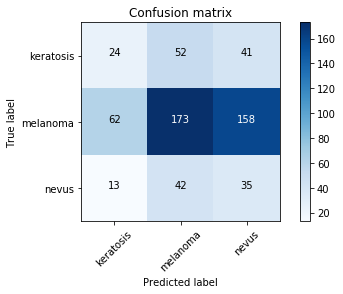

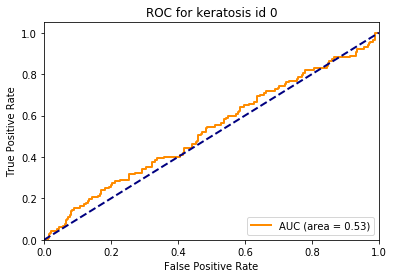

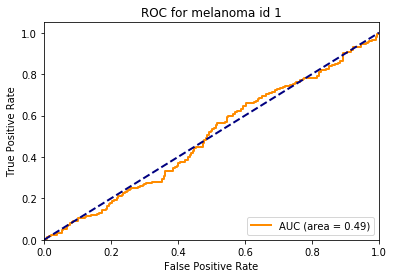

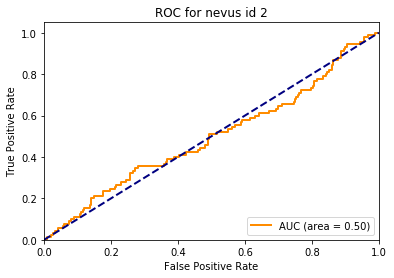

In [7]:
trainer2.test_eval()